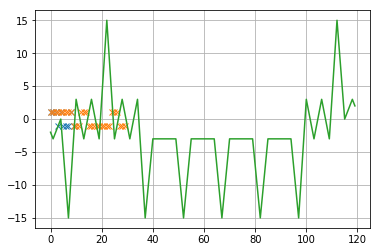

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
code = np.array([+1, +1, +1, -1, +1], dtype=np.int8)
plt.plot(np.concatenate([code, -code]), 'x')
plt.grid()

### +1=1, -1= 0
lenght = 3
code_signal = np.repeat(code, lenght)
plt.plot(np.concatenate([code_signal, -code_signal]), 'x')
plt.grid()

def str2bits(s):
    byte_str = s.encode(encoding='ascii')
    return byte_str
###print(list(str2bits('a'))) ### если убрать list то будет буква, а не ее номер в кодировке

def str2bits(s):
    byte_str = s.encode(encoding='ascii')
    byte_array = np.frombuffer(byte_str, dtype=np.uint8)
    bits = np.unpackbits( byte_array)
    return bits
###print(str2bits('A'), list(b'A')) ###выводит сначала битовое представление номера символа в кодировке, а затем сам номер элемента А в кодировке

def bits2signal(bits):
    data = 2*np.asarray(bits, dtype=np.float) - 1 ### переводим минус и плюс единицы в нули и единицы
    return(np.outer(data, code_signal).reshape(-1))
bits = str2bits('A')
signal =  bits2signal(bits)
###print(signal)

def func(signal, sigma=1):
    obs = signal + np.random.normal(scale=sigma, size = signal.size)
    return(obs)

y = func(signal, sigma=0)
###print(y)

###plt.figure()
###plt.plot(np.convolve(code_signal,code_signal[::-1],  mode='full'))

def decode(y):
    conv = np.convolve(y, code_signal[::-1], mode='same')
    return conv
decoded = decode(y)
plt.plot(decoded)
plt.grid()
### когда меняем сигму - меняем шум
### у - чистый сигнал, декодед - с шумом

### как превратить биты в строчку

def bits2str(bits):
    bits = np.asarray(bits, dtype=np.uint8)
    byte_array = np.packbits(bits)
    byte_str = byte_array.tobytes()
    s = byte_str.decode(encoding='ascii')
    return s
###message = 'hello'
###print(message, bits2str(str2bits(message))) - эти две строки есть проверка кодинга и раскодинга (assert вместо принта проверит на правильность)

#data = fits.open(адрес)[2].data
#print(data.shape)
#plt.imshow(data[0])
#plt.figure()
#s = (np.abs(fft.ifft2(data[0]))**2, vmax=1)
#plt.imshow(np.fft.fftshift(s), vmax =10)

